In [ ]:
"""
ECO930J : Données massives et apprentissage automatique avec applications en économie
TP

Results analysis by graphics creation

15 avril 2022

@author: LALS12039506, AGHN21599906, VAUG30119904, UQAM
"""

# Import relevant libraries
import numpy  as np
import pandas as pd          
import os
import matplotlib as plot
import seaborn as sns
import matplotlib.pyplot as plt

# Location/path of project
path = os.getcwd()
os.chdir(path)

## Imports results

In [1]:
fname = "mse_var.txt"
with open(fname) as f:
    mse_var = pd.read_table(f, sep=',', index_col=0, header=0)
    
fname = "hyperpara.txt"
with open(fname) as f:
    hyperpara = pd.read_table(f, sep=',', index_col=0, header=0)
    
fname = "bag_lambda.txt"
with open(fname) as f:
    bag_lambda = pd.read_table(f, sep=',', header=0)
    
fname = "Lasso_coefficients.txt"
with open(fname) as f:
    Lasso_coef = pd.read_table(f, sep=',', index_col=0, header=0)

fname = "RF_features_importances.txt"
with open(fname) as f:
    RF_features = pd.read_table(f, sep=',', index_col=0, header=0)

FileNotFoundError: ignored

## MSE/var groupé

In [ ]:
mse_var

,Lasso,Ridge,Elas_Net,Reg_Tree,Boost_Trees,RF,NN_(5:100),NN_(2:5),Bag_Lasso
abalone,0.459043,0.455838,0.459043,0.542854,0.476738,0.485890,0.448202,0.442964,0.456956
boston,0.239309,0.240699,0.241393,0.164041,0.086562,0.076241,0.086380,0.141649,0.264919
california,0.346140,0.346102,0.346098,0.277108,0.157299,0.165663,0.191708,0.232819,0.346927
unemploy,0.266032,0.259407,0.273111,0.660182,0.381560,0.315201,0.249452,0.575723,0.397580
infl,1.108107,1.237023,1.108107,1.169978,1.101777,1.234296,0.941190,2.751157,1.322360
wine,0.719850,0.717569,0.717548,0.723128,0.544244,0.452213,0.625196,0.672873,0.721252
fish,0.447508,0.446196,0.445954,0.550473,0.470572,0.462223,0.458955,0.450610,0.453508


<AxesSubplot:>

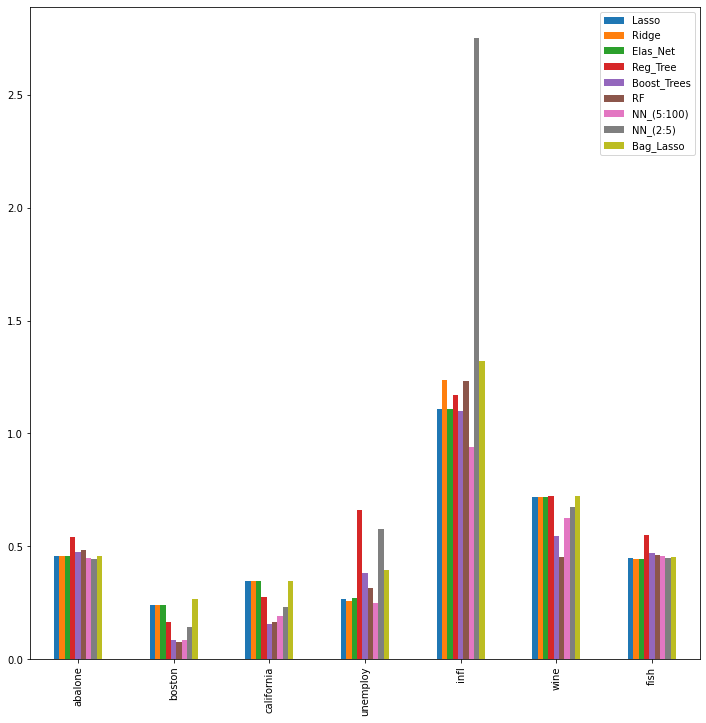

In [ ]:
mse_var.plot(kind='bar', figsize=(12,12))

## On rapporte les test MSEs (dans un barplot pour chaque data set) divisés par la variance de Y_test.

Text(0, 0.5, 'MSE/Var')

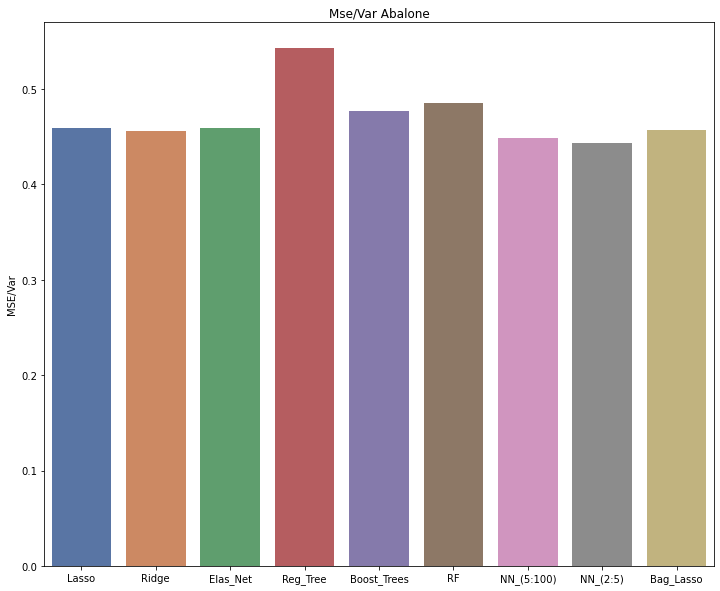

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.barplot(x = mse_var.columns, y = mse_var.iloc[0,:], palette = 'deep')

plt.title('Mse/Var Abalone')
plt.ylabel('MSE/Var')

Text(0, 0.5, 'MSE/Var')

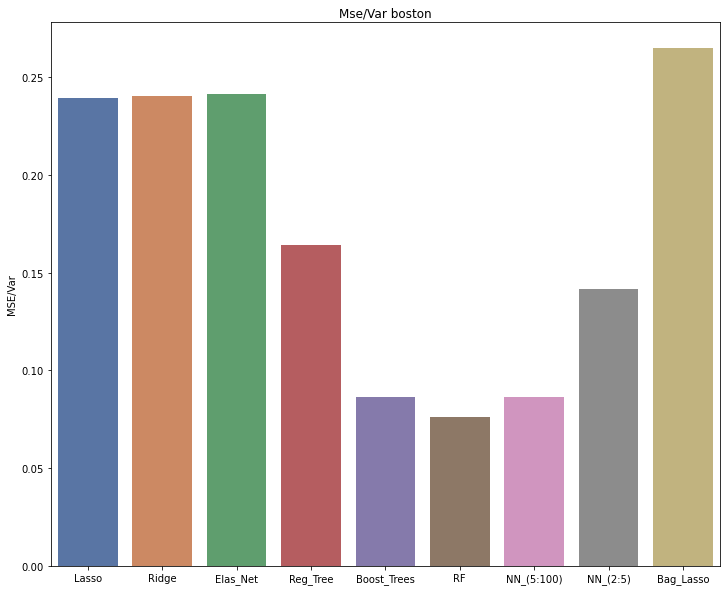

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.barplot(x = mse_var.columns, y = mse_var.iloc[1,:], palette = 'deep')

plt.title('Mse/Var boston')
plt.ylabel('MSE/Var')

Text(0, 0.5, 'MSE/Var')

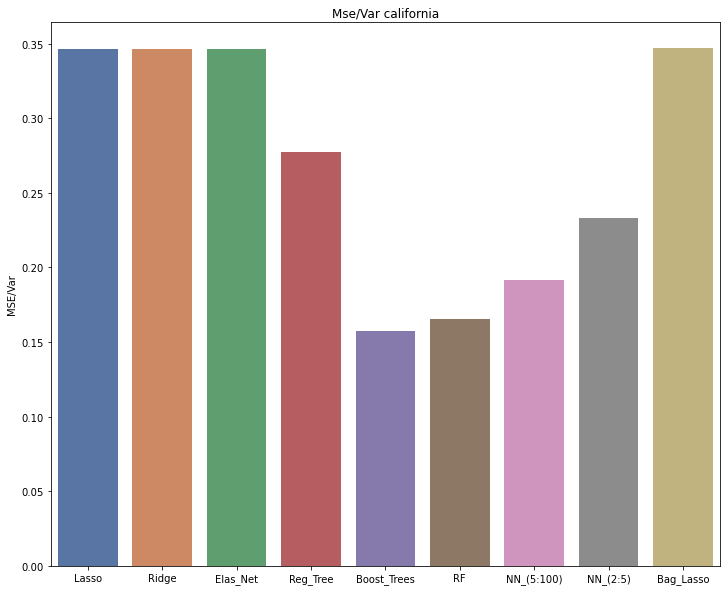

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.barplot(x = mse_var.columns, y = mse_var.iloc[2,:], palette = 'deep')

plt.title('Mse/Var california')
plt.ylabel('MSE/Var')

Text(0, 0.5, 'MSE/Var')

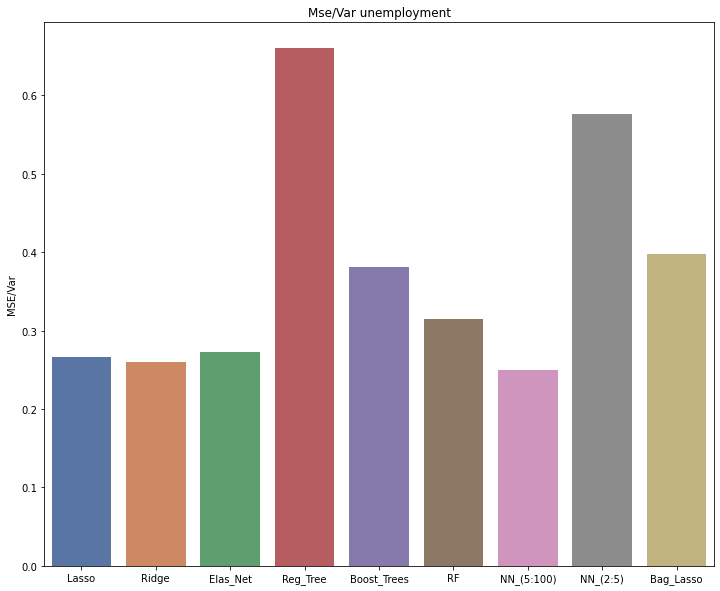

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.barplot(x = mse_var.columns, y = mse_var.iloc[3,:], palette = 'deep')

plt.title('Mse/Var unemployment')
plt.ylabel('MSE/Var')

Text(0, 0.5, 'MSE/Var')

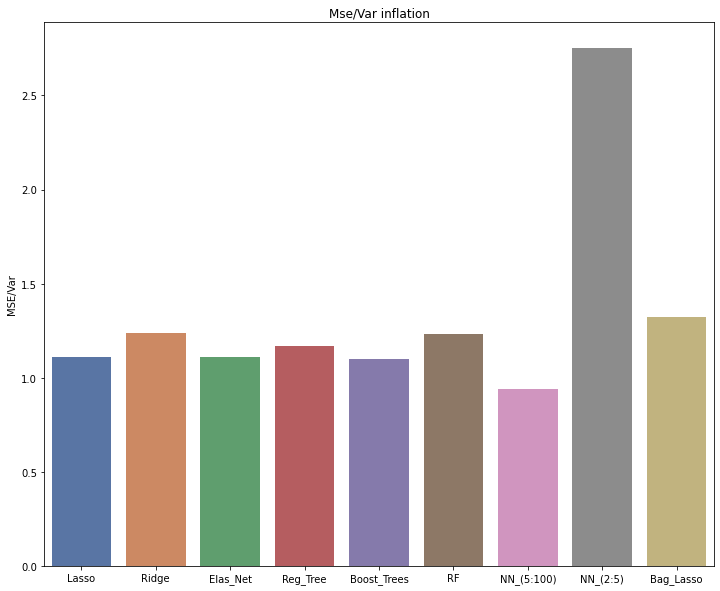

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.barplot(x = mse_var.columns, y = mse_var.iloc[4,:], palette = 'deep')

plt.title('Mse/Var inflation')
plt.ylabel('MSE/Var')

Text(0, 0.5, 'MSE/Var')

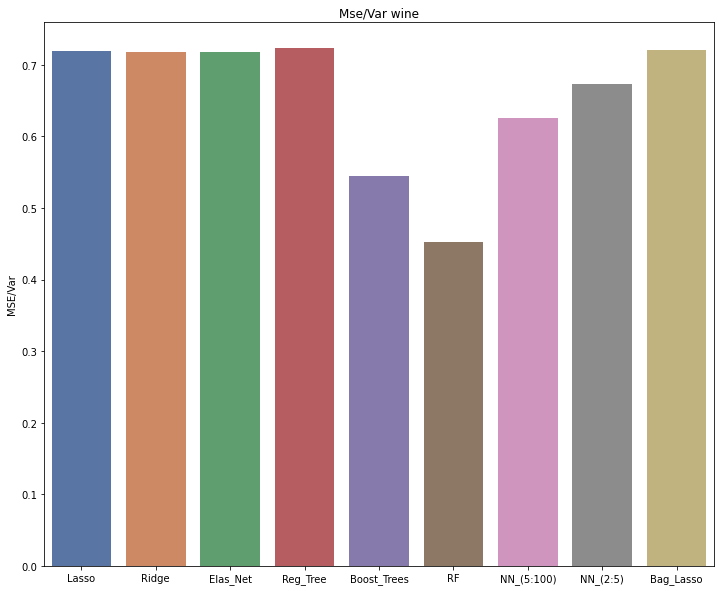

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.barplot(x = mse_var.columns, y = mse_var.iloc[5,:], palette = 'deep')

plt.title('Mse/Var wine')
plt.ylabel('MSE/Var')

Text(0, 0.5, 'MSE/Var')

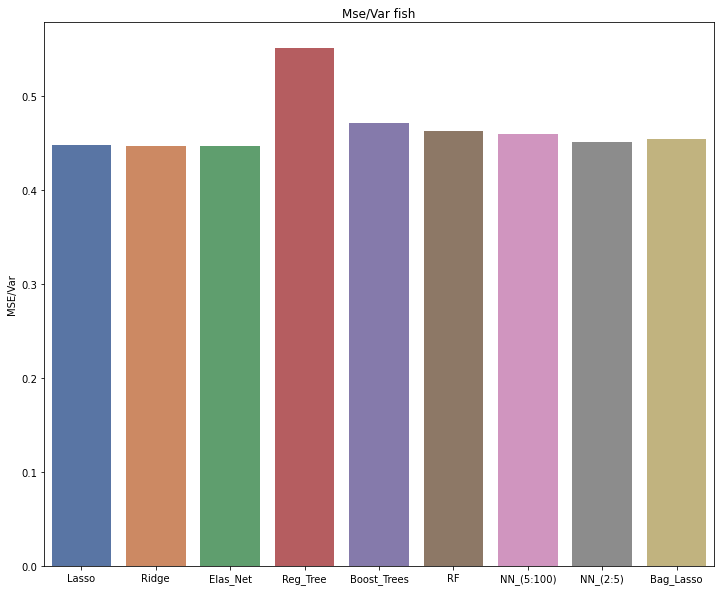

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.barplot(x = mse_var.columns, y = mse_var.iloc[6,:], palette = 'deep')

plt.title('Mse/Var fish')
plt.ylabel('MSE/Var')

## Hyperparamètres par validation croisée

In [ ]:
hyperpara

,L_lambda,R_lambda,EN_lambda,EN_alpha,RT_depth,BT_learn_rate,BT_depth,BT_#tree,RF_mtry,NN_5:100_learn_rate,NN_5:100_early_stop,NN_2:5_learn_rate,NN_2:5_early_stop
abalone,1.599859e-03,0.790604,0.001600,1.000,5,0.010,4,750,0.3333333333333333,0.010,50,0.100,100
boston,9.102982e-04,8.040132,0.026827,0.001,9,0.010,3,750,0.3333333333333333,0.001,20,0.010,50
california,1.000000e-08,0.193070,0.000013,0.001,9,0.100,4,750,0.5,0.001,20,0.010,100
unemploy,6.250552e-02,911.162756,6.464372,0.001,4,0.050,3,750,sqrt,0.010,10,0.001,20
infl,4.714866e-02,162.975083,0.047149,1.000,3,0.050,1,500,sqrt,0.001,50,0.010,10
wine,6.551286e-03,48.626016,0.011514,0.001,4,0.100,4,750,0.3333333333333333,0.001,10,0.001,50
fish,1.000000e-08,20.092330,0.035565,0.001,4,0.005,4,750,0.3333333333333333,0.010,10,0.050,10


## Sélection alphas

In [ ]:
bag_lambda

,abalone,boston,california,unemploy,infl,wine,fish
0,0.000222,0.000010,0.000010,0.000010,0.008685,0.000391,0.003728
1,0.000910,0.002812,0.000018,0.015264,0.020236,0.006551,0.000910
2,0.000910,0.004942,0.000010,0.082864,0.015264,0.002121,0.003728
3,0.000910,0.000518,0.000010,0.008685,0.008685,0.008685,0.004942
4,0.000010,0.004942,0.000041,0.015264,0.035565,0.003728,0.000687
...,...,...,...,...,...,...,...
195,0.000168,0.000518,0.000010,0.062506,0.015264,0.000910,0.000910
196,0.000010,0.002812,0.000010,0.109854,0.026827,0.000391,0.011514
197,0.000072,0.006551,0.000910,0.062506,0.026827,0.000391,0.000010
198,0.001207,0.004942,0.000023,0.026827,0.020236,0.004942,0.008685


In [ ]:
lambda_abalone = hyperpara.iloc[0,0]
lambda_boston = hyperpara.iloc[1,0]
lambda_california = hyperpara.iloc[2,0]
lambda_unemploy = hyperpara.iloc[3,0]
lambda_infl = hyperpara.iloc[4,0]
lambda_wine = hyperpara.iloc[5,0]
lambda_fish = hyperpara.iloc[6,0]

# Calcul de la moyenne et de la médiane des différentes bases de données à partir de la méthode bagging lambda :

In [ ]:
bl_abalone_moy = bag_lambda['abalone'].mean()
bl_abalone_med = bag_lambda['abalone'].median()

bl_boston_moy = bag_lambda['boston'].mean()
bl_boston_med = bag_lambda['boston'].median()

bl_california_moy = bag_lambda['california'].mean()
bl_california_med = bag_lambda['california'].median()

bl_unemploy_moy = bag_lambda['unemploy'].mean()
bl_unemploy_med = bag_lambda['unemploy'].median()

bl_infl_moy = bag_lambda['infl'].mean()
bl_infl_med = bag_lambda['infl'].median()

bl_wine_moy = bag_lambda['wine'].mean()
bl_wine_med = bag_lambda['wine'].median()

bl_fish_moy = bag_lambda['fish'].mean()
bl_fish_med = bag_lambda['fish'].median()

# Mise en histogramme bagging lasso:

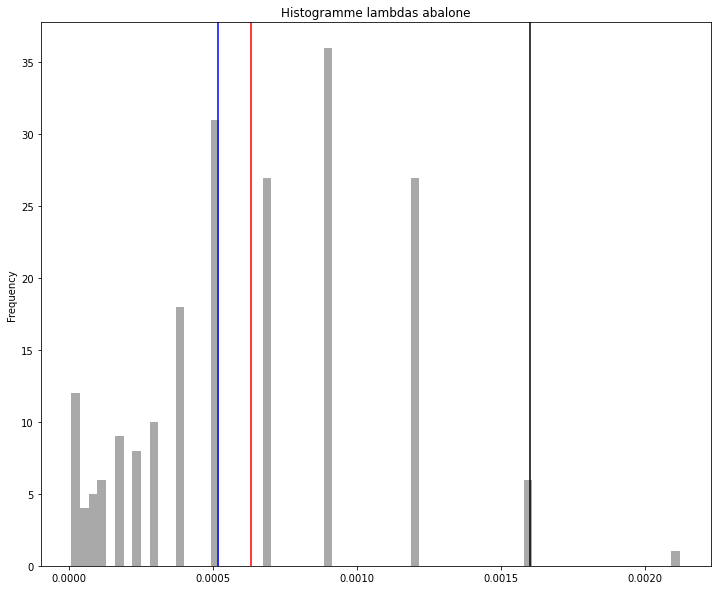

In [ ]:
plt.hist(bag_lambda["abalone"], bins=70, color='darkgray')
plt.gca().set(title='Histogramme lambdas abalone', ylabel='Frequency');
plt.axvline(x=bl_abalone_moy, color='r')
plt.axvline(x=bl_abalone_med, color='b')
plt.axvline(x=lambda_abalone, color='black')

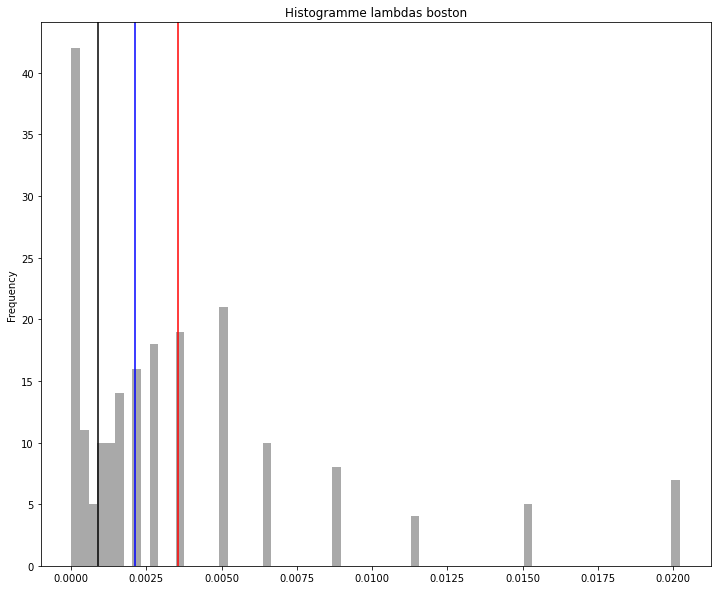

In [ ]:
plt.hist(bag_lambda["boston"], bins=70, color='darkgray')
plt.gca().set(title='Histogramme lambdas boston', ylabel='Frequency');
plt.axvline(x=bl_boston_moy, color='r')
plt.axvline(x=bl_boston_med, color='b')
plt.axvline(x=lambda_boston, color='black')

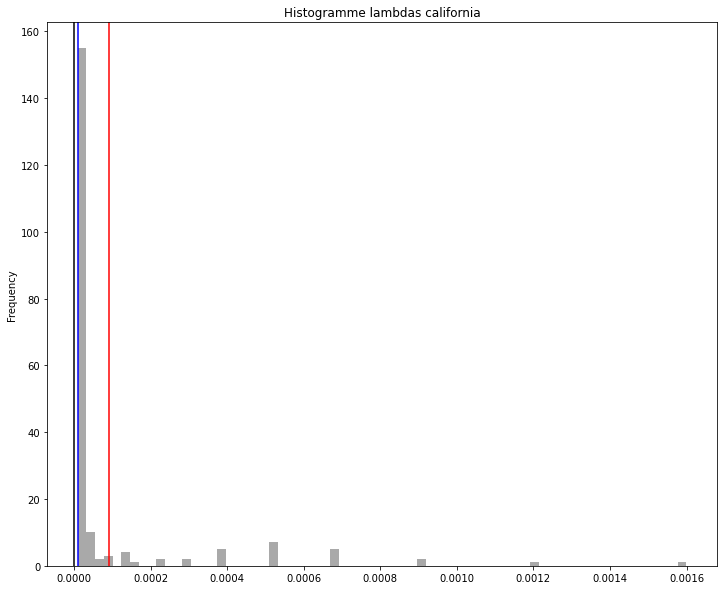

In [ ]:
plt.hist(bag_lambda["california"], bins=70, color='darkgray')
plt.gca().set(title='Histogramme lambdas california', ylabel='Frequency');
plt.axvline(x=bl_california_moy, color='r')
plt.axvline(x=bl_california_med, color='b')
plt.axvline(x=lambda_california, color='black')

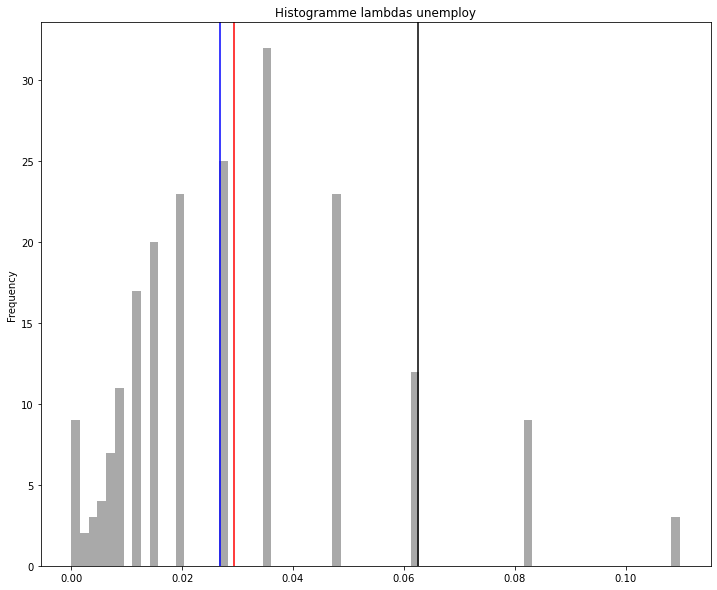

In [ ]:
plt.hist(bag_lambda["unemploy"], bins=70, color='darkgray')
plt.gca().set(title='Histogramme lambdas unemploy', ylabel='Frequency');
plt.axvline(x=bl_unemploy_moy, color='r')
plt.axvline(x=bl_unemploy_med, color='b')
plt.axvline(x=lambda_unemploy, color='black')

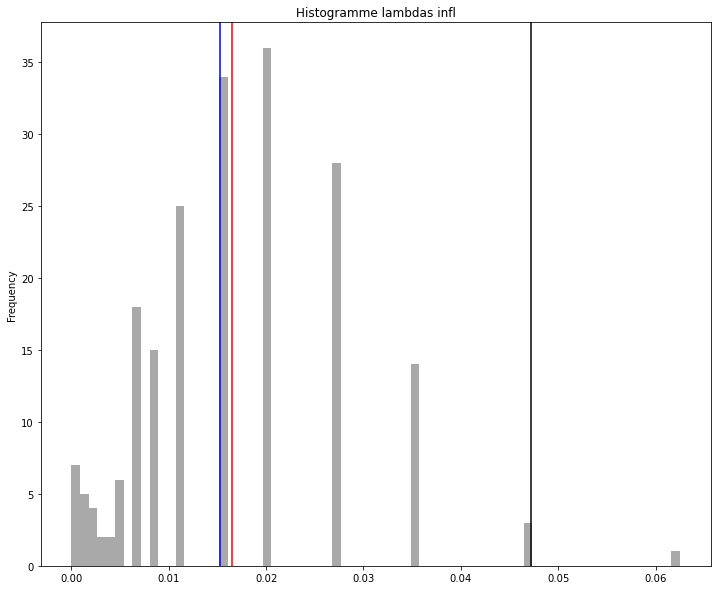

In [ ]:
plt.hist(bag_lambda["infl"], bins=70, color='darkgray')
plt.gca().set(title='Histogramme lambdas infl', ylabel='Frequency');
plt.axvline(x=bl_infl_moy, color='r')
plt.axvline(x=bl_infl_med, color='b')
plt.axvline(x=lambda_infl, color='black')

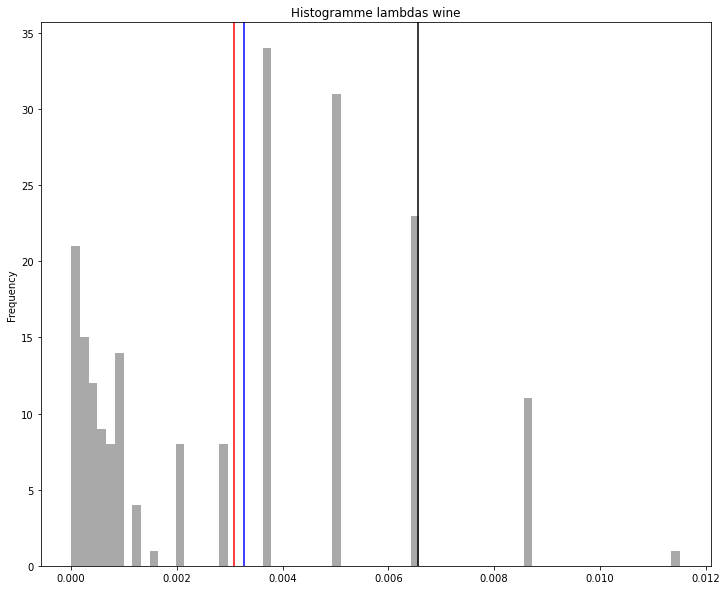

In [ ]:
plt.hist(bag_lambda["wine"], bins=70, color='darkgray')
plt.gca().set(title='Histogramme lambdas wine', ylabel='Frequency');
plt.axvline(x=bl_wine_moy, color='r')
plt.axvline(x=bl_wine_med, color='b')
plt.axvline(x=lambda_wine, color='black')

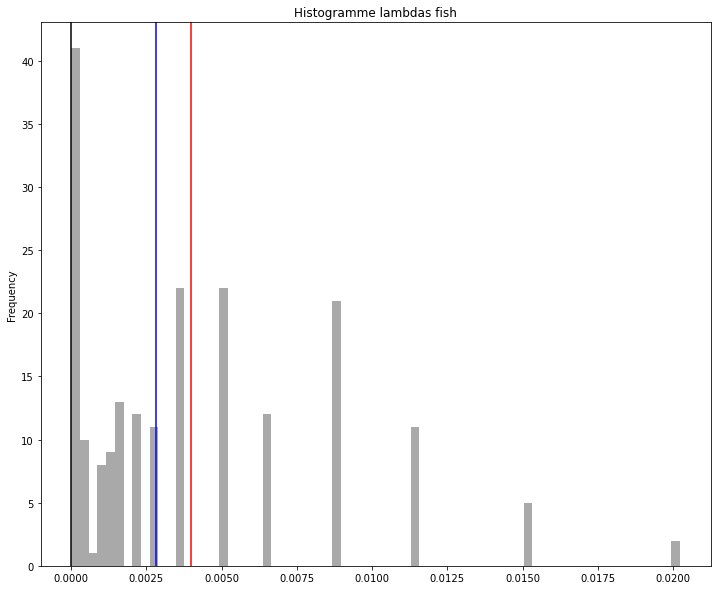

In [ ]:
plt.hist(bag_lambda["fish"], bins=70, color='darkgray')
plt.gca().set(title='Histogramme lambdas fish', ylabel='Frequency');
plt.axvline(x=bl_fish_moy, color='r')
plt.axvline(x=bl_fish_med, color='b')
plt.axvline(x=lambda_fish, color='black')

## Dans le cas de California Housing, Unemployment (h=1), et Inflation (h=1) on rapporte les variables qui semblent les plus importantes selon Lasso et Random Forest en utilisant le «variable importance » :

In [ ]:
Lasso_coef

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
California_names,ocean_proximity_ISLAND,median_income,latitude,longitude,population,households,ocean_proximity_INLAND,total_bedrooms,ocean_proximity_NEAR OCEAN,housing_median_age
California_values,1.706264590113694,0.6338548007930609,0.4587436424612425,0.4537010215832591,0.3882287752300573,0.26037582735621817,0.2595513438522138,0.2578591162467127,0.13146933000546937,0.11312196336466443
unemploy_names,L0_PERMITS,L0_HOANBS,L0_NDMANEMP,FL1_AAA,L0_CPF3MTB3Mx,L0_TLBSNNCBx,L1_S.P.div.yield,L2_F2,L0_DRIWCIL,L0_HWIURATIOx
unemploy_values,0.17426530162352996,0.1741033595720481,0.1161971296806989,0.10194350756930823,0.09095739904944714,0.07220054847659722,0.0627882679684532,0.04908513455390506,0.04312510968256924,0.04030855857885208
infl_names,L_0y,L_2y,L_1y,FL1_ULCBS,FL1_CIVPART,FL1_EXSZUSx,L0_TB3MS,FL1_WPSFD4111,FL1_FEDFUNDS,FL1_CES3000000008x
infl_values,0.33073457952432,0.2206050118930488,0.09177762215521748,0.08613760380100204,0.07711231930819068,0.07617718400522083,0.07364432784785391,0.06548065853865596,0.06429695801857539,0.047751989085730494


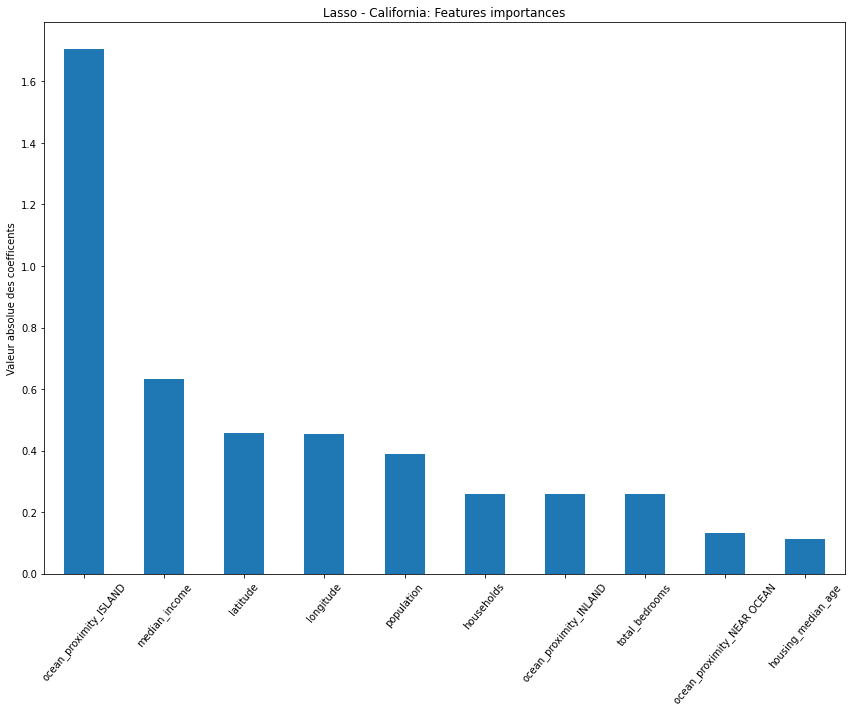

In [ ]:
values = Lasso_coef.loc[['California_values']].to_numpy().flatten().astype("float64")
names  = Lasso_coef.loc[['California_names']].to_numpy().flatten().tolist()

graph = pd.Series(values, index=names)
fig, ax = plt.subplots()
graph.plot.bar(ax=ax)
ax.set_title("Lasso - California: Features importances")
ax.set_ylabel("Valeur absolue des coefficents")
plt.xticks(rotation = 50)
fig.tight_layout()

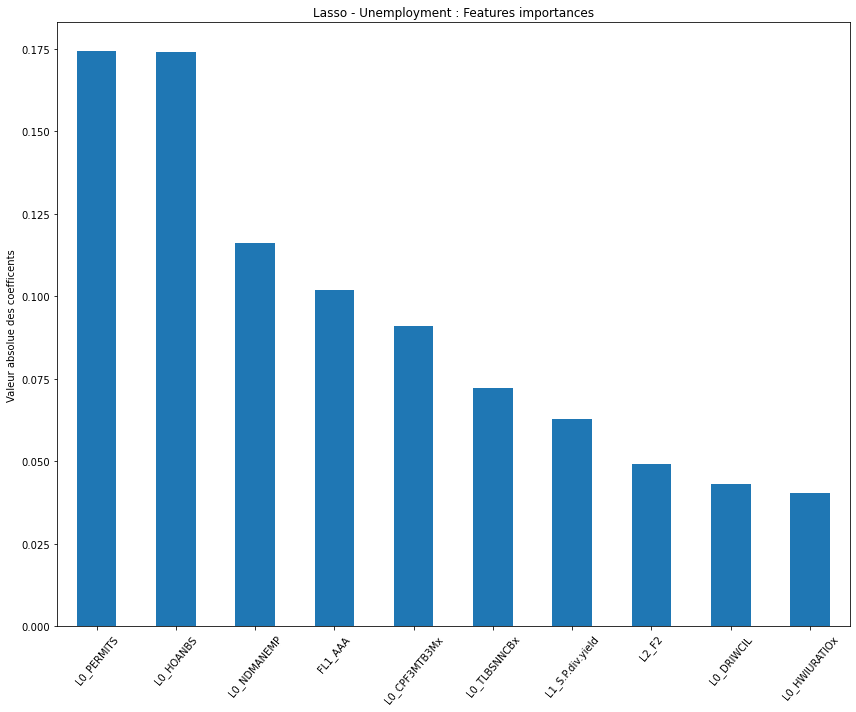

In [ ]:
values = Lasso_coef.loc[['unemploy_values']].to_numpy().flatten().astype("float64")
names  = Lasso_coef.loc[['unemploy_names']].to_numpy().flatten().tolist()

graph = pd.Series(values, index=names)
fig, ax = plt.subplots()
graph.plot.bar(ax=ax)
ax.set_title("Lasso - Unemployment : Features importances")
ax.set_ylabel("Valeur absolue des coefficents")
plt.xticks(rotation = 50)
fig.tight_layout()

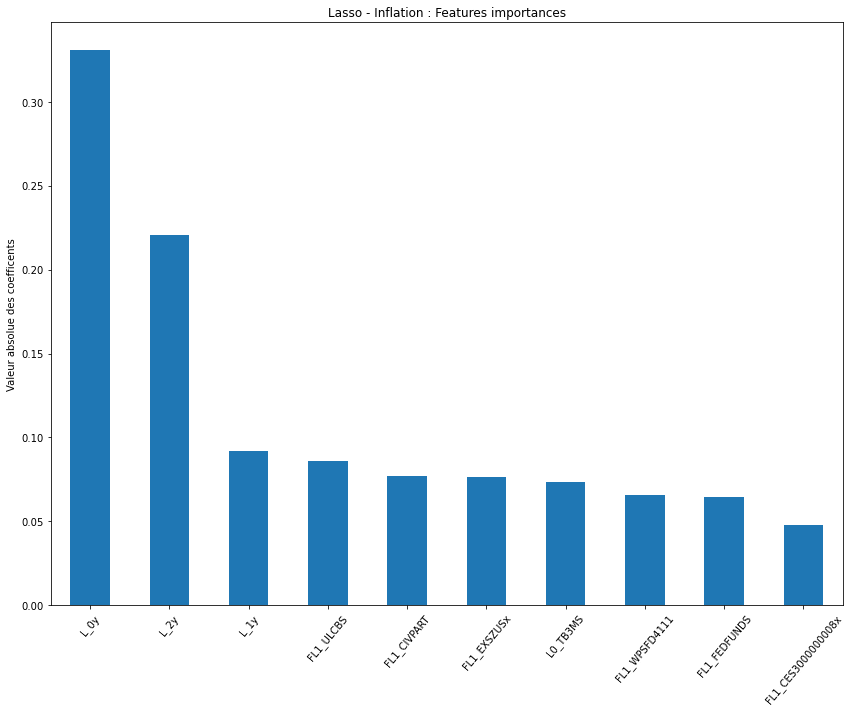

In [ ]:
values = Lasso_coef.loc[['infl_values']].to_numpy().flatten().astype("float64")
names  = Lasso_coef.loc[['infl_names']].to_numpy().flatten().tolist()

graph = pd.Series(values, index=names)
fig, ax = plt.subplots()
graph.plot.bar(ax=ax)
ax.set_title("Lasso - Inflation : Features importances")
ax.set_ylabel("Valeur absolue des coefficents")
plt.xticks(rotation = 50)
fig.tight_layout()

## RF_features

In [ ]:
RF_features

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
California_names,median_income,ocean_proximity_INLAND,longitude,latitude,housing_median_age,population,total_rooms,total_bedrooms,households,ocean_proximity_<1H OCEAN
California_values,0.409204945661183,0.1472469236160185,0.12655166031637657,0.11517874855360444,0.04596739834784389,0.040492567944040006,0.03458194909820088,0.028181910531632874,0.02653285779029477,0.014479474910182267
unemploy_names,L0_SPCS20RSA,L0_HWIURATIOx,L0_HOANBS,L0_SPCS10RSA,L0_UNRATESTx,L0_DRIWCIL,L0_HOABS,L0_FPIx,L0_OUTMS,L0_F1
unemploy_values,0.031308363462179876,0.019108709100780216,0.019072283060634822,0.018458833320748245,0.017925695579548893,0.01715245731999703,0.015831122504522205,0.014296010926041854,0.013826983431588578,0.012964354294342223
infl_names,L_0y,FL1_USMINE,L_1y,L_2y,L0_AAAFFM,L0_GS10TB3Mx,FL1_BUSINVx,FL1_ULCNFB,FL1_ULCBS,FL1_RSAFSx
infl_values,0.04175240667271397,0.036042710100614495,0.029243310239421085,0.028122136077941246,0.026195114529733745,0.0241871894267837,0.023837349790458817,0.01874732926807925,0.018128940437373814,0.01786822162257598


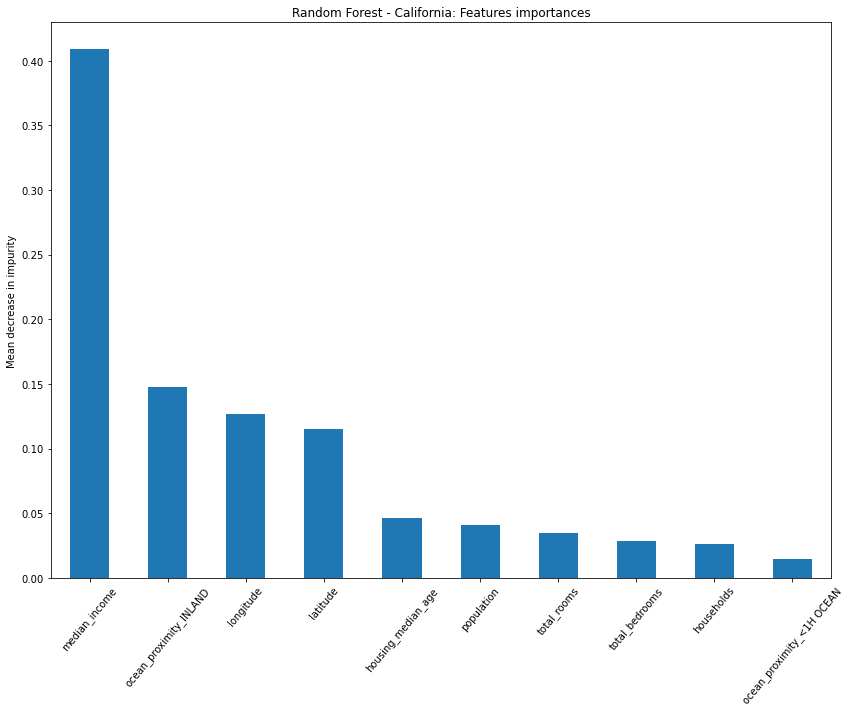

In [ ]:
values = RF_features.loc[['California_values']].to_numpy().flatten().astype("float64")
names  = RF_features.loc[['California_names']].to_numpy().flatten().tolist()

graph = pd.Series(values, index=names)
fig, ax = plt.subplots()
graph.plot.bar(ax=ax)
ax.set_title("Random Forest - California: Features importances")
ax.set_ylabel("Mean decrease in impurity")
plt.xticks(rotation = 50)
fig.tight_layout()

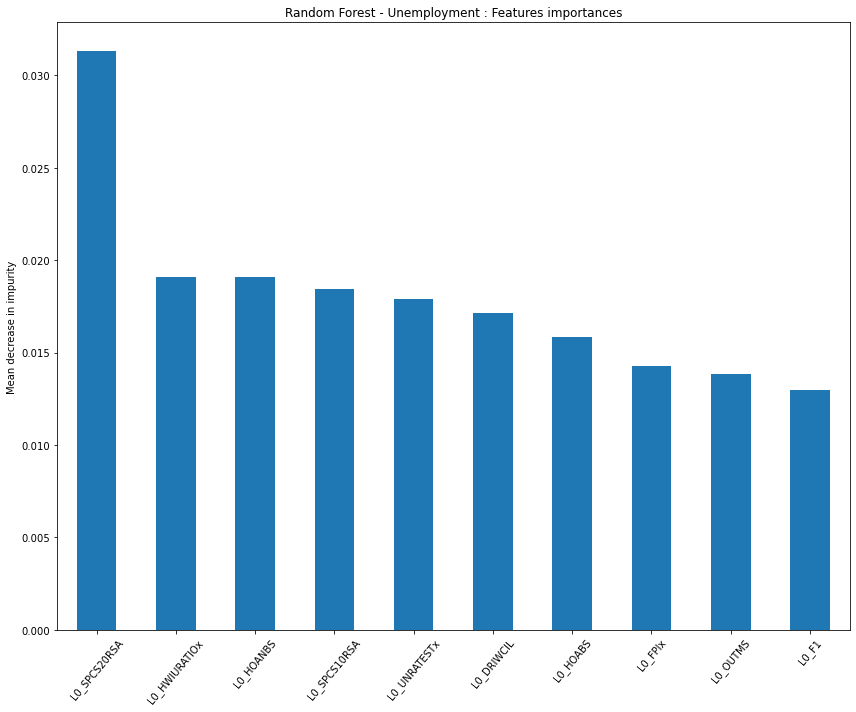

In [ ]:
values = RF_features.loc[['unemploy_values']].to_numpy().flatten().astype("float64")
names  = RF_features.loc[['unemploy_names']].to_numpy().flatten().tolist()

graph = pd.Series(values, index=names)
fig, ax = plt.subplots()
graph.plot.bar(ax=ax)
ax.set_title("Random Forest - Unemployment : Features importances")
ax.set_ylabel("Mean decrease in impurity")
plt.xticks(rotation = 50)
fig.tight_layout()

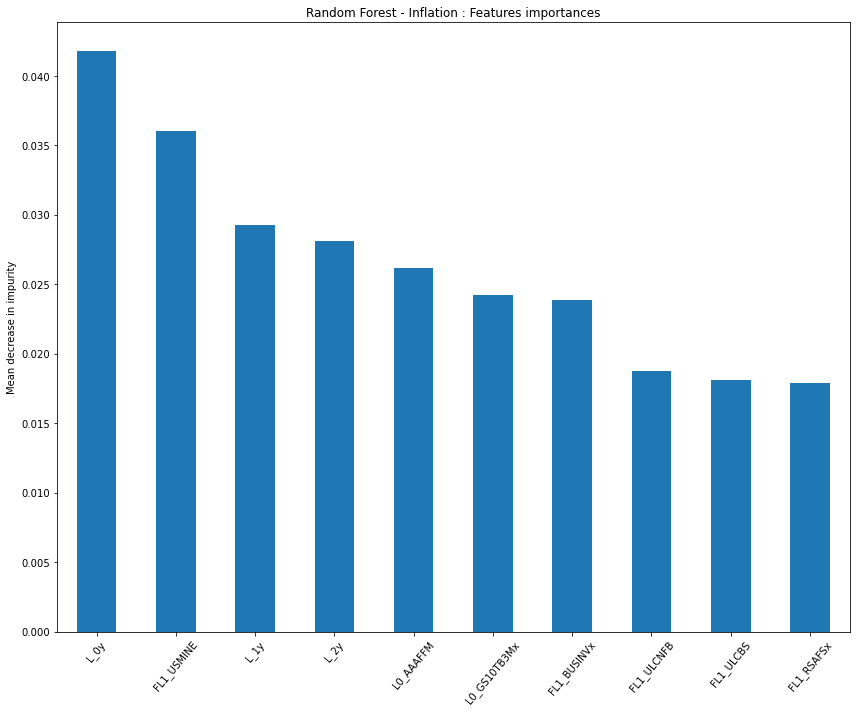

In [ ]:
values = RF_features.loc[['infl_values']].to_numpy().flatten().astype("float64")
names  = RF_features.loc[['infl_names']].to_numpy().flatten().tolist()

graph = pd.Series(values, index=names)
fig, ax = plt.subplots()
graph.plot.bar(ax=ax)
ax.set_title("Random Forest - Inflation : Features importances")
ax.set_ylabel("Mean decrease in impurity")
plt.xticks(rotation = 50)
fig.tight_layout()